<a href="https://colab.research.google.com/github/cauekssouza/Arvores/blob/main/Memoria_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install memory_profiler

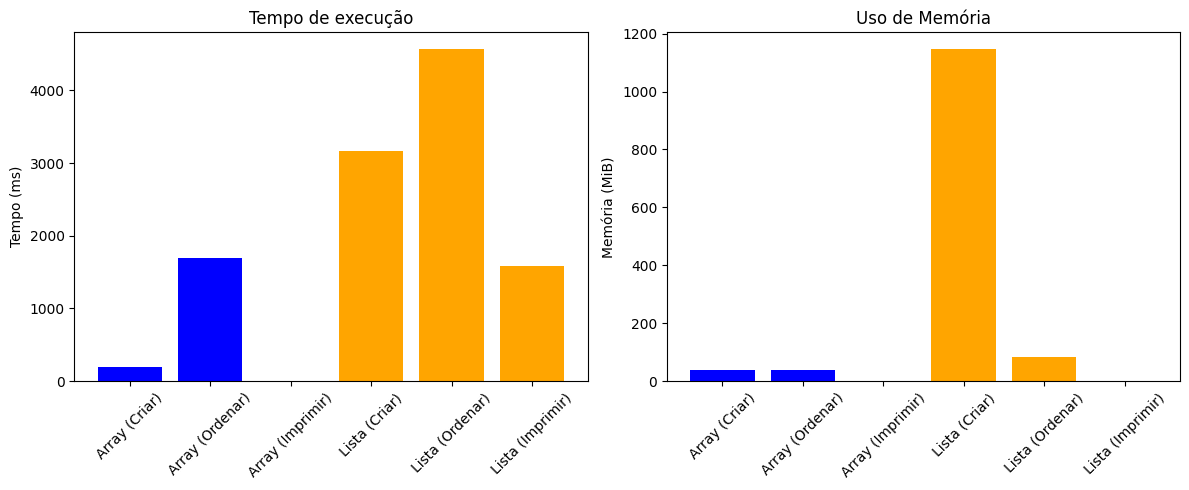

In [4]:
import numpy as np
import time
import memory_profiler
import matplotlib.pyplot as plt
import sys
import gc
from decimal import Decimal, getcontext

# Configura a precisão para 100 casas decimais
getcontext().prec = 102

def medir_memoria_tempo(func, *args):
    gc.collect()  # Força a coleta de lixo antes da medição
    memoria_antes = memory_profiler.memory_usage()[0]
    tempo_inicio = time.perf_counter_ns()
    resultado = func(*args)
    tempo_fim = time.perf_counter_ns()
    memoria_depois = memory_profiler.memory_usage()[0]
    memoria_usada = memoria_depois - memoria_antes
    return resultado, (tempo_fim - tempo_inicio), memoria_usada

def criar_array_aleatorio():
    return np.random.choice(list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"), size=10000000)

def criar_lista_aleatoria():
    return list(np.random.choice(list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"), size=10000000))

def ordenar_array(arr):
    return np.sort(arr)

def ordenar_lista(lst):
    return sorted(lst)

def imprimir_array(arr):
    sys.stdout = open('/dev/null', 'w')  # Suprime a saída para medir apenas tempo/memória
    print(arr)
    sys.stdout.close()
    sys.stdout = sys.__stdout__  # Restaura a saída padrão

def imprimir_lista(lst):
    sys.stdout = open('/dev/null', 'w')  # Suprime a saída para medir apenas tempo/memória
    print(lst)
    sys.stdout.close()
    sys.stdout = sys.__stdout__  # Restaura a saída padrão

def calcular_pi(n_termos=1000000):
    pi = Decimal(0)
    for k in range(n_termos):
        pi += Decimal((-1)**k) / Decimal(2*k + 1)
    pi *= 4
    return pi

dados = {}

# Medições para arrays NumPy
dados['criar_array'] = medir_memoria_tempo(criar_array_aleatorio)
dados['ordenar_array'] = medir_memoria_tempo(ordenar_array, dados['criar_array'][0])
dados['imprimir_array'] = medir_memoria_tempo(imprimir_array, dados['criar_array'][0])

# Medições para listas Python
dados['criar_lista'] = medir_memoria_tempo(criar_lista_aleatoria)
dados['ordenar_lista'] = medir_memoria_tempo(ordenar_lista, dados['criar_lista'][0])
dados['imprimir_lista'] = medir_memoria_tempo(imprimir_lista, dados['criar_lista'][0])

# Medição para cálculo de π
dados['calcular_pi'] = medir_memoria_tempo(calcular_pi)

# Exibição dos resultados
for chave, (_, tempo_ns, memoria_dif) in dados.items():
    print(f"{chave}: Tempo = {tempo_ns / 1e6:.3f} ms, Memória = {memoria_dif:.6f} MiB")

# Gráficos comparativos
tarefas = ["Criar", "Ordenar", "Imprimir"]
valores_tempo = [dados[f'criar_array'][1], dados[f'ordenar_array'][1], dados[f'imprimir_array'][1],
                 dados[f'criar_lista'][1], dados[f'ordenar_lista'][1], dados[f'imprimir_lista'][1]]
valores_tempo = [t / 1e6 for t in valores_tempo]  # Convertendo para milissegundos

valores_memoria = [dados[f'criar_array'][2], dados[f'ordenar_array'][2], dados[f'imprimir_array'][2],
                   dados[f'criar_lista'][2], dados[f'ordenar_lista'][2], dados[f'imprimir_lista'][2]]

rotulos = ["Array (Criar)", "Array (Ordenar)", "Array (Imprimir)",
           "Lista (Criar)", "Lista (Ordenar)", "Lista (Imprimir)"]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(rotulos, valores_tempo, color=['blue', 'blue', 'blue', 'orange', 'orange', 'orange'])
plt.ylabel("Tempo (ms)")
plt.title("Tempo de execução")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(rotulos, valores_memoria, color=['blue', 'blue', 'blue', 'orange', 'orange', 'orange'])
plt.ylabel("Memória (MiB)")
plt.title("Uso de Memória")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


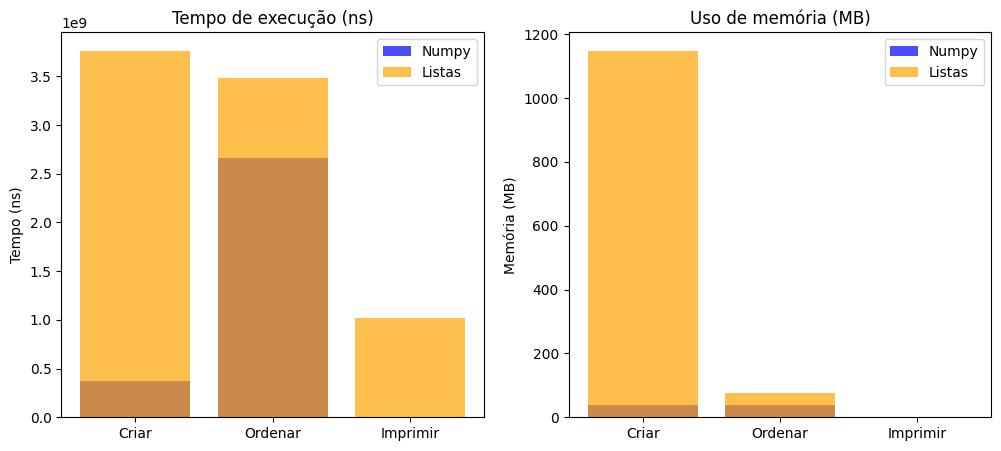

In [5]:
import numpy as np
import time
import memory_profiler
import matplotlib.pyplot as plt
import sys
import gc
from decimal import Decimal, getcontext

def leibniz_pi(n_terms):
    pi = Decimal(0)
    for k in range(n_terms):
        pi += Decimal((-1)**k) / Decimal(2*k + 1)
    return pi * 4

def measure_memory_time(func, *args):
    gc.collect()  # Força a coleta de lixo
    mem_before = memory_profiler.memory_usage()[0]
    start_time = time.perf_counter_ns()
    result = func(*args)
    end_time = time.perf_counter_ns()
    mem_after = memory_profiler.memory_usage()[0]

    return result, end_time - start_time, mem_after - mem_before

# Configuração de precisão para 100 casas decimais
getcontext().prec = 100

# Criar arrays/listas com 10 milhões de elementos para medições mais realistas
def create_numpy_array():
    return np.random.choice(list("abcdefghijklmnopqrstuvwxyz"), 10_000_000)

def create_list():
    return list(np.random.choice(list("abcdefghijklmnopqrstuvwxyz"), 10_000_000))

def print_silent(obj):
    sys.stdout = open('/dev/null', 'w')  # Suprime a saída do terminal
    print(obj)
    sys.stdout.close()
    sys.stdout = sys.__stdout__  # Restaura a saída

# Medições para numpy arrays
arr_np, time_np_create, mem_np_create = measure_memory_time(create_numpy_array)
_, time_np_sort, mem_np_sort = measure_memory_time(np.sort, arr_np)
_, time_np_print, mem_np_print = measure_memory_time(print_silent, arr_np)

# Medições para listas
arr_list, time_list_create, mem_list_create = measure_memory_time(create_list)
_, time_list_sort, mem_list_sort = measure_memory_time(sorted, arr_list)
_, time_list_print, mem_list_print = measure_memory_time(print_silent, arr_list)

# Medição única para cálculo de π
_, time_pi, mem_pi = measure_memory_time(leibniz_pi, 1000000)

# Dados para gráficos
tasks = ["Criar", "Ordenar", "Imprimir"]
time_np = [time_np_create, time_np_sort, time_np_print]
time_list = [time_list_create, time_list_sort, time_list_print]
mem_np = [mem_np_create, mem_np_sort, mem_np_print]
mem_list = [mem_list_create, mem_list_sort, mem_list_print]

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(tasks, time_np, label="Numpy", alpha=0.7, color='blue')
axes[0].bar(tasks, time_list, label="Listas", alpha=0.7, color='orange')
axes[0].set_title("Tempo de execução (ns)")
axes[0].set_ylabel("Tempo (ns)")
axes[0].legend()

axes[1].bar(tasks, mem_np, label="Numpy", alpha=0.7, color='blue')
axes[1].bar(tasks, mem_list, label="Listas", alpha=0.7, color='orange')
axes[1].set_title("Uso de memória (MB)")
axes[1].set_ylabel("Memória (MB)")
axes[1].legend()

plt.show()
